# Working With Dates in Pandas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Create your own date

In [2]:
#import datetime
from datetime import datetime

In [10]:
#calculate now
today = datetime.now()
today

datetime.datetime(2022, 9, 21, 11, 31, 42, 173690)

In [11]:
#display datatype
type(today)

datetime.datetime

In [13]:
#manually set date with (year, month, day)
date = datetime(month=12, year=2002, day=2)
date

datetime.datetime(2002, 12, 2, 0, 0)

In [14]:
#display datatype
type(date)

datetime.datetime

In [19]:
date2 = pd.Timestamp(month=3, year=2020, day=30)
date2

Timestamp('2020-03-30 00:00:00')

In [20]:
type(date2)

pandas._libs.tslibs.timestamps.Timestamp

## Transform to date format

### One date

In [21]:
date = 'Jan 1 1970'

In [22]:
#display datatype
type(date)

str

In [24]:
#use pd.to_datetime() to convert
date = pd.to_datetime(date)
date

Timestamp('1970-01-01 00:00:00')

In [25]:
#display datatype
type(date)

pandas._libs.tslibs.timestamps.Timestamp

### One date, but confuse pandas

In [26]:
date = 'Jan:7:1970'

In [27]:
#display datatype
type(date)

str

In [29]:
#use pd.to_datetime() to convert
# pd.to_datetime(date)

We can fix this error using the `format` argument.

For info on formatting: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [32]:
#use format arguement
date = pd.to_datetime(date, format='%b:%d:%Y')
date

Timestamp('1970-01-07 00:00:00')

using `strftime` to reformat date

In [44]:
date2 = date.strftime('%Y-%m-%d')
date2

'1970-01-07'

In [45]:
type(date2)

str

### Now a whole columns of dates

In [46]:
url = "https://gist.githubusercontent.com/ryanorsinger/\
b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)

In [49]:
#look at data
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [50]:
#look at datatypes
df.dtypes

date                   object
coffee_consumption    float64
dtype: object

In [55]:
#use pd.to_datetime() to convert
pd.to_datetime(df.date)

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

In [57]:
#can also use .astype() to convert
df.date = df.date.astype('datetime64')
df.date

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

> use pd.to_datetime when you have weird dates, so you can use the format argument

In [58]:
#look at datatypes
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

## Now that they are in a date format, let's manipulate them

In [59]:
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


### use `.dt` to extract pieces of the date

the documentation: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [61]:
df.date.dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
256    2019
257    2019
258    2019
259    2019
260    2019
Name: date, Length: 261, dtype: int64

In [63]:
df.date.dt.month

0       1
1       1
2       1
3       1
4       1
       ..
256    12
257    12
258    12
259    12
260    12
Name: date, Length: 261, dtype: int64

### we can add them back to our initial dataframe

In [64]:
#add them all
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [65]:
df.head()

,date,coffee_consumption,year,month,day
0,2019-01-01,14.301915,2019,1,1
1,2019-01-02,12.905900,2019,1,2
2,2019-01-03,10.046015,2019,1,3
3,2019-01-04,6.354805,2019,1,4
4,2019-01-07,8.545563,2019,1,7


### Reformat date using `dt.strftime()`

In [69]:
df.date.dt.strftime('%Y%m%d')

0      20190101
1      20190102
2      20190103
3      20190104
4      20190107
         ...   
256    20191225
257    20191226
258    20191227
259    20191230
260    20191231
Name: date, Length: 261, dtype: object

In [70]:
df.date.dt.strftime('%Y/%m/%d')

0      2019/01/01
1      2019/01/02
2      2019/01/03
3      2019/01/04
4      2019/01/07
          ...    
256    2019/12/25
257    2019/12/26
258    2019/12/27
259    2019/12/30
260    2019/12/31
Name: date, Length: 261, dtype: object

In [72]:
df.date.dt.strftime('%a, %b - %d')

0      Tue, Jan - 01
1      Wed, Jan - 02
2      Thu, Jan - 03
3      Fri, Jan - 04
4      Mon, Jan - 07
           ...      
256    Wed, Dec - 25
257    Thu, Dec - 26
258    Fri, Dec - 27
259    Mon, Dec - 30
260    Tue, Dec - 31
Name: date, Length: 261, dtype: object

## Time to make it more complex!

In [187]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)
df

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
...,...,...,...,...
23669,2017-07-01 05-PM,ETHUSD,272.57,1894983.33
23670,2017-07-01 04-PM,ETHUSD,265.74,1287300.75
23671,2017-07-01 03-PM,ETHUSD,268.79,1500282.55
23672,2017-07-01 02-PM,ETHUSD,274.83,1702536.85


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Close   23674 non-null  float64
 3   Volume  23674 non-null  float64
dtypes: float64(2), object(2)
memory usage: 739.9+ KB


In [189]:
#lowercase columns
df.columns = df.columns.str.lower()

In [190]:
df

,date,symbol,close,volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
...,...,...,...,...
23669,2017-07-01 05-PM,ETHUSD,272.57,1894983.33
23670,2017-07-01 04-PM,ETHUSD,265.74,1287300.75
23671,2017-07-01 03-PM,ETHUSD,268.79,1500282.55
23672,2017-07-01 02-PM,ETHUSD,274.83,1702536.85


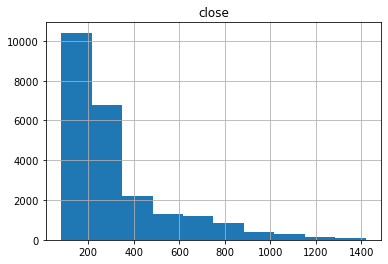

In [191]:
df.close.hist()
plt.title('close')
plt.show()

#### let's plot the our close value

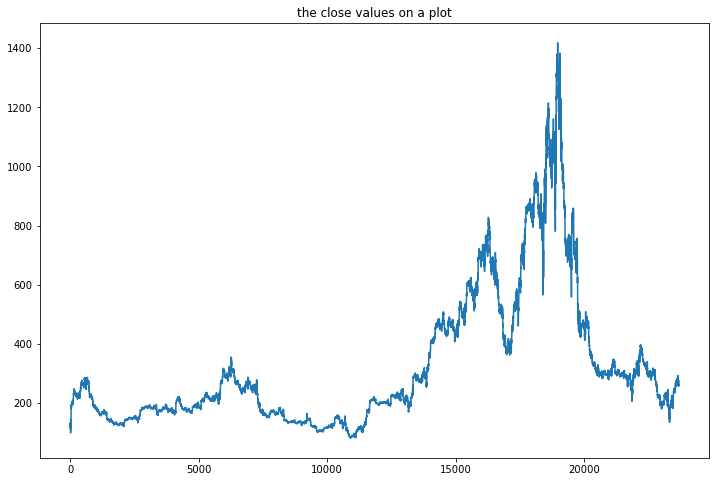

In [192]:
plt.figure(figsize=(12,8))

df.close.plot()

plt.title('the close values on a plot')
plt.show()

> when we plot a single series using .plot(), the x-axis is the index value

## How do we make pandas time aware for time analysis?

1. Convert 'date/time' column to datetime object in Pandas (pd.to_datetime())
2. Set the datetime column as index
3. Sort the datetime index

### 1. Convert to datetime

In [193]:
df.head()

,date,symbol,close,volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44


In [194]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %I-%p')

> format argument allows us to tell pandas the makeup of our date, so it can be understood

In [195]:
df.dtypes

date      datetime64[ns]
symbol            object
close            float64
volume           float64
dtype: object

### 2. Set the datetime column as index

In [196]:
df.head()

,date,symbol,close,volume
0,2020-03-13 12:00:00,ETHUSD,128.71,3906590.52
1,2020-03-13 00:00:00,ETHUSD,129.94,10329663.70
2,2020-03-13 11:00:00,ETHUSD,119.51,3311080.29
3,2020-03-13 10:00:00,ETHUSD,124.47,3483436.48
4,2020-03-13 09:00:00,ETHUSD,124.08,2767584.44


In [197]:
df = df.set_index('date')
df.head()

,symbol,close,volume
date,,,
2020-03-13 12:00:00,ETHUSD,128.71,3906590.52
2020-03-13 00:00:00,ETHUSD,129.94,10329663.70
2020-03-13 11:00:00,ETHUSD,119.51,3311080.29
2020-03-13 10:00:00,ETHUSD,124.47,3483436.48
2020-03-13 09:00:00,ETHUSD,124.08,2767584.44


### 3. Sort the datetime index

In [198]:
df

,symbol,close,volume
date,,,
2020-03-13 12:00:00,ETHUSD,128.71,3906590.52
2020-03-13 00:00:00,ETHUSD,129.94,10329663.70
2020-03-13 11:00:00,ETHUSD,119.51,3311080.29
2020-03-13 10:00:00,ETHUSD,124.47,3483436.48
2020-03-13 09:00:00,ETHUSD,124.08,2767584.44
...,...,...,...
2017-07-01 17:00:00,ETHUSD,272.57,1894983.33
2017-07-01 16:00:00,ETHUSD,265.74,1287300.75
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


In [199]:
df = df.sort_index()
df

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55
...,...,...,...
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81


#### Now let's plot it again!

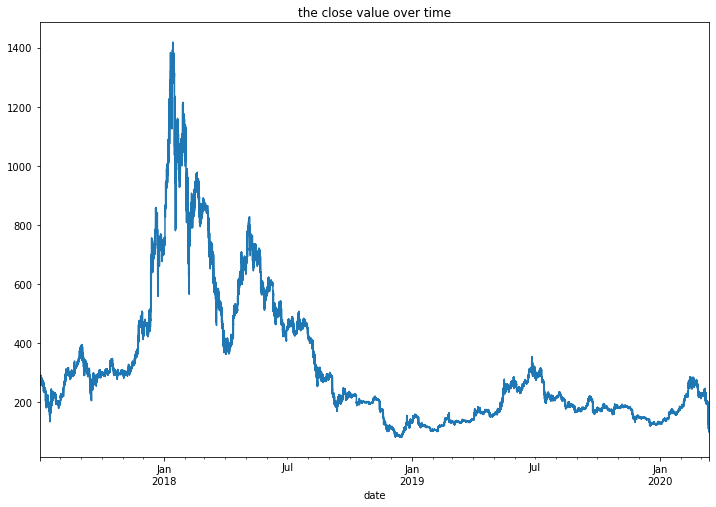

In [200]:
plt.figure(figsize=(12,8))

df.close.plot()

plt.title('the close value over time')
plt.show()

## Let's look at the the mean close value on each day of the week

In [201]:
df.head()

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


In [202]:
#pull out weekday name & save
df['weekday'] = df.index.day_name()

In [203]:
df.head()

,symbol,close,volume,weekday
date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [204]:
df.groupby('weekday').mean()

,close,volume
weekday,,
Friday,321.134596,2.135718e+06
Monday,326.186823,1.913387e+06
Saturday,327.707441,1.455576e+06
Sunday,326.316418,1.453492e+06
Thursday,323.334524,2.250669e+06
Tuesday,325.189722,2.355955e+06
Wednesday,324.622361,2.510756e+06


#### let's plot it!

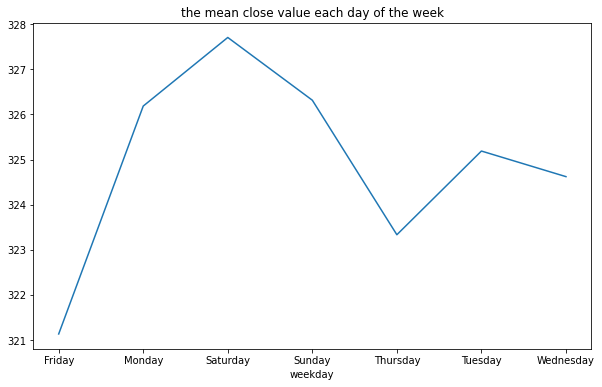

In [205]:
plt.figure(figsize=(10,6))

df.groupby('weekday').mean().close.plot()

plt.title('the mean close value each day of the week')
plt.show()

### But Misty, I don't like that the days aren't in order

In [206]:
#use dayofweek attribute
df['weekday_num'] = df.index.dayofweek

In [207]:
df

,symbol,close,volume,weekday,weekday_num
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5
...,...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71,Friday,4
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday,4
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81,Friday,4


In [208]:
df.groupby('weekday').mean().sort_values('weekday_num')

,close,volume,weekday_num
weekday,,,
Monday,326.186823,1.913387e+06,0.0
Tuesday,325.189722,2.355955e+06,1.0
Wednesday,324.622361,2.510756e+06,2.0
Thursday,323.334524,2.250669e+06,3.0
Friday,321.134596,2.135718e+06,4.0
Saturday,327.707441,1.455576e+06,5.0
Sunday,326.316418,1.453492e+06,6.0


In [209]:
df.weekday.value_counts()

Sunday       3384
Monday       3384
Tuesday      3384
Wednesday    3384
Thursday     3384
Friday       3381
Saturday     3373
Name: weekday, dtype: int64

#### let's plot it better this time!

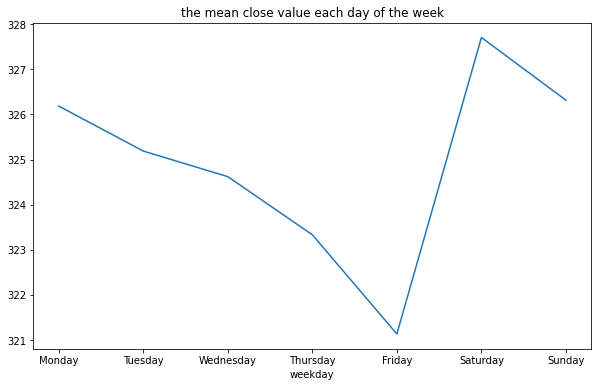

In [210]:
plt.figure(figsize=(10,6))

df.groupby('weekday').mean().sort_values('weekday_num').close.plot()

plt.title('the mean close value each day of the week')
plt.show()

## How do we get a subset of the dataframe?

In [211]:
df.head()

,symbol,close,volume,weekday,weekday_num
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5


In [212]:
df.tail()

,symbol,close,volume,weekday,weekday_num
date,,,,,
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71,Friday,4
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday,4
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81,Friday,4
2020-03-13 19:00:00,ETHUSD,134.03,7579741.09,Friday,4
2020-03-13 20:00:00,ETHUSD,124.85,1940673.93,Friday,4


In [213]:
df.sample(10)

,symbol,close,volume,weekday,weekday_num
date,,,,,
2018-01-11 16:00:00,ETHUSD,1228.25,11617874.40,Thursday,3
2018-09-23 03:00:00,ETHUSD,240.24,472826.06,Sunday,6
2019-10-10 01:00:00,ETHUSD,193.37,446431.89,Thursday,3
2017-08-28 10:00:00,ETHUSD,344.56,459901.88,Monday,0
2019-10-09 16:00:00,ETHUSD,181.20,2929163.74,Wednesday,2
2018-06-11 21:00:00,ETHUSD,517.61,1371913.44,Monday,0
2018-04-23 07:00:00,ETHUSD,644.46,2758049.51,Monday,0
2018-07-02 00:00:00,ETHUSD,478.47,636985.00,Monday,0
2018-03-30 17:00:00,ETHUSD,393.00,2743208.97,Friday,4


In [214]:
#single .loc value
df.loc['2017-11-21 19:00:00']

symbol             ETHUSD
close              368.91
volume         3434163.09
weekday           Tuesday
weekday_num             1
Name: 2017-11-21 19:00:00, dtype: object

> `.loc` lets you send an index value and then it will give you the corresponding rows

In [215]:
df.head()

,symbol,close,volume,weekday,weekday_num
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5


In [216]:
#range of .loc values
df.loc['2017-07':'2017-10']

,symbol,close,volume,weekday,weekday_num
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5
...,...,...,...,...,...
2017-10-31 19:00:00,ETHUSD,307.00,1214500.39,Tuesday,1
2017-10-31 20:00:00,ETHUSD,306.54,1133347.49,Tuesday,1
2017-10-31 21:00:00,ETHUSD,306.00,988956.56,Tuesday,1


In [217]:
#using .loc for one year
df.loc['2018']

,symbol,close,volume,weekday,weekday_num
date,,,,,
2018-01-01 00:00:00,ETHUSD,754.42,2697546.48,Monday,0
2018-01-01 01:00:00,ETHUSD,734.59,1886624.01,Monday,0
2018-01-01 02:00:00,ETHUSD,730.01,2950627.37,Monday,0
2018-01-01 03:00:00,ETHUSD,747.90,3461348.11,Monday,0
2018-01-01 04:00:00,ETHUSD,757.86,3180304.69,Monday,0
...,...,...,...,...,...
2018-12-31 19:00:00,ETHUSD,135.41,3380282.07,Monday,0
2018-12-31 20:00:00,ETHUSD,135.99,1775465.69,Monday,0
2018-12-31 21:00:00,ETHUSD,135.01,1079617.65,Monday,0


In [218]:
#use iloc for pulling back by index position
df.iloc[0:10]

,symbol,close,volume,weekday,weekday_num
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5
2017-07-01 16:00:00,ETHUSD,265.74,1287300.75,Saturday,5
2017-07-01 17:00:00,ETHUSD,272.57,1894983.33,Saturday,5
2017-07-01 18:00:00,ETHUSD,268.00,5396852.35,Saturday,5
2017-07-01 19:00:00,ETHUSD,263.51,3962669.00,Saturday,5


## What if we want a different period of data?

In [224]:
# df.resample('D').agg(['mean','min','max'])

In [225]:
#drop extra columns
df = df[['close']]
df.head(10)

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 13:00:00,275.01
2017-07-01 14:00:00,274.83
2017-07-01 15:00:00,268.79
2017-07-01 16:00:00,265.74
2017-07-01 17:00:00,272.57
2017-07-01 18:00:00,268.00
2017-07-01 19:00:00,263.51


### Downsampling: reduce frequency

use `asfreq` to change the period

In [226]:
#set frequency to daily
df.asfreq('D')

,close
date,
2017-07-01 11:00:00,257.13
2017-07-02 11:00:00,282.30
2017-07-03 11:00:00,279.50
2017-07-04 11:00:00,269.57
2017-07-05 11:00:00,265.20
...,...
2020-03-09 11:00:00,198.34
2020-03-10 11:00:00,203.12
2020-03-11 11:00:00,193.37


In [227]:
#set frequency to monthly
df.asfreq('M').head(10)

,close
date,
2017-07-31 11:00:00,199.96
2017-08-31 11:00:00,388.19
2017-09-30 11:00:00,300.37
2017-10-31 11:00:00,303.45
2017-11-30 11:00:00,420.42
2017-12-31 11:00:00,750.11
2018-01-31 11:00:00,1090.00
2018-02-28 11:00:00,869.62
2018-03-31 11:00:00,394.53


#### let's plot it by month!

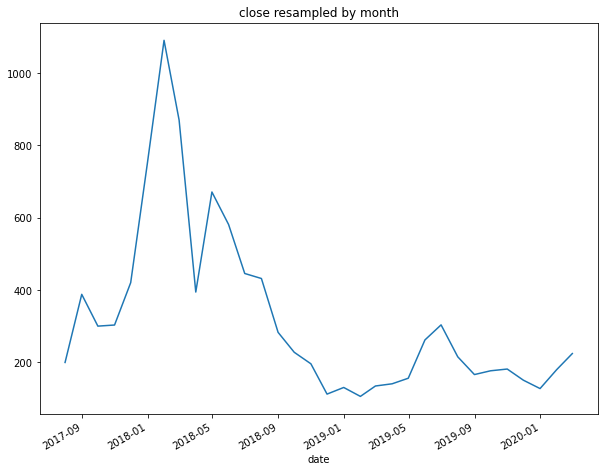

In [228]:
plt.figure(figsize=(10,8))

df.asfreq('M').close.plot()

plt.title('close resampled by month')
plt.show()

#### What if I want the first day of the month?

[Pandas asfreq Offset Aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

[Pandas asfreq Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)

In [229]:
#set to first day of the month
df.asfreq('MS').head()

,close
date,
2017-07-01 11:00:00,257.13
2017-08-01 11:00:00,228.84
2017-09-01 11:00:00,391.83
2017-10-01 11:00:00,300.76
2017-11-01 11:00:00,289.15


#### let's plot it!

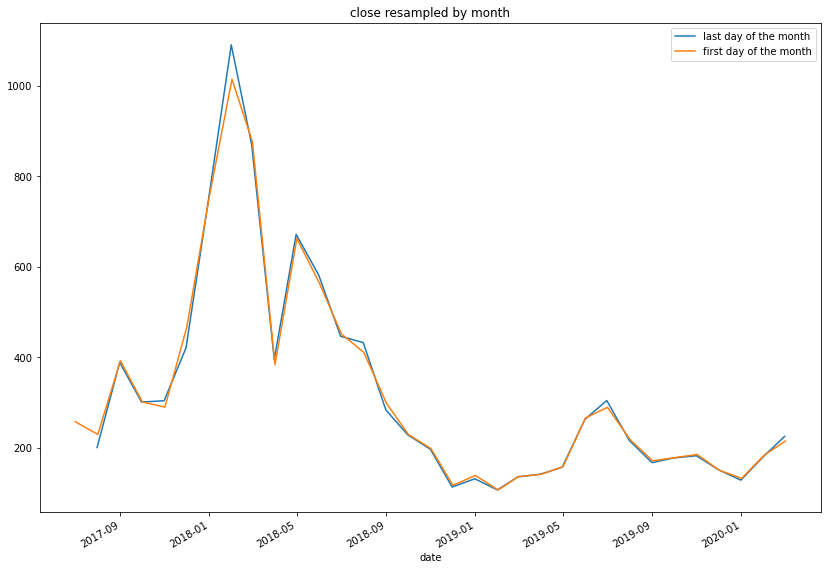

In [230]:
plt.figure(figsize=(14,10))

df.asfreq('M').close.plot(label='last day of the month')
df.asfreq('MS').close.plot(label='first day of the month')

plt.title('close resampled by month')
plt.legend()
plt.show()

### Upsampling: Increase frequency

In [231]:
df.head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 13:00:00,275.01
2017-07-01 14:00:00,274.83
2017-07-01 15:00:00,268.79


In [232]:
#set frequency to minutes
df.asfreq('30T')

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:30:00,NaN
2017-07-01 12:00:00,263.12
2017-07-01 12:30:00,NaN
2017-07-01 13:00:00,275.01
...,...
2020-03-13 18:00:00,128.93
2020-03-13 18:30:00,NaN
2020-03-13 19:00:00,134.03


> generates null for values we don't have, but we can fill them!

In [233]:
#use ffill method
df.asfreq('30T', method='ffill')

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:30:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 12:30:00,263.12
2017-07-01 13:00:00,275.01
...,...
2020-03-13 18:00:00,128.93
2020-03-13 18:30:00,128.93
2020-03-13 19:00:00,134.03


In [234]:
# use bfill method
df.asfreq('30T', method='bfill')

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:30:00,263.12
2017-07-01 12:00:00,263.12
2017-07-01 12:30:00,275.01
2017-07-01 13:00:00,275.01
...,...
2020-03-13 18:00:00,128.93
2020-03-13 18:30:00,134.03
2020-03-13 19:00:00,134.03


### Resampling - Aggregating over time

In [235]:
df.head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 13:00:00,275.01
2017-07-01 14:00:00,274.83
2017-07-01 15:00:00,268.79


In [236]:
df.head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 13:00:00,275.01
2017-07-01 14:00:00,274.83
2017-07-01 15:00:00,268.79


In [237]:
df.resample('D').agg(['mean','min','max'])['close']

,mean,min,max
date,,,
2017-07-01,265.284615,257.13,275.01
2017-07-02,269.782500,256.81,292.54
2017-07-03,278.882083,274.89,282.36
2017-07-04,276.743333,268.95,282.58
2017-07-05,265.025833,255.42,271.00
...,...,...,...
2020-03-09,200.818333,193.26,207.79
2020-03-10,201.577500,196.55,205.79
2020-03-11,195.910417,184.25,202.48


#### let's plot it!

In [238]:
#get the daily mean
df_daily = df.resample('D').mean()
df_daily

,close
date,
2017-07-01,265.284615
2017-07-02,269.782500
2017-07-03,278.882083
2017-07-04,276.743333
2017-07-05,265.025833
...,...
2020-03-09,200.818333
2020-03-10,201.577500
2020-03-11,195.910417


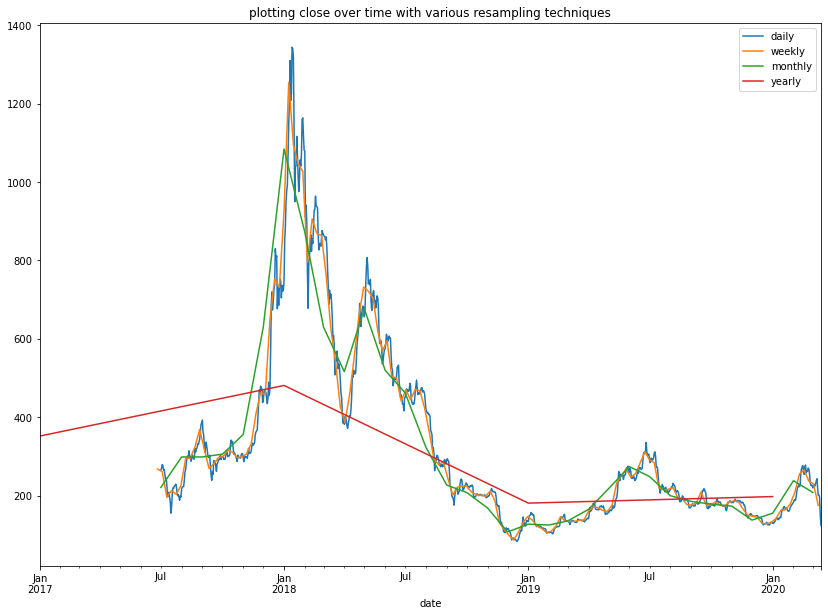

In [244]:
plt.figure(figsize=(14,10))

df_daily.close.plot(label='daily')
df_daily.resample('W').mean().close.plot(label='weekly')
df_daily.resample('M').mean().close.plot(label='monthly')
df_daily.resample('Y').mean().close.plot(label='yearly')

plt.title('plotting close over time with various resampling techniques')
plt.legend()
plt.show()

### Rolling averages

- Generally used to smooth out short-term fluctuations in time series data and highlight long-term trends
- use `rolling()` to calculate

In [247]:
#define df resampled daily with the mean
df_daily.head()

,close
date,
2017-07-01,265.284615
2017-07-02,269.782500
2017-07-03,278.882083
2017-07-04,276.743333
2017-07-05,265.025833


In [251]:
#use the rolling function
df_daily.rolling(5).mean().head(10)

,close
date,
2017-07-01,NaN
2017-07-02,NaN
2017-07-03,NaN
2017-07-04,NaN
2017-07-05,271.143673
2017-07-06,271.382750
2017-07-07,268.214667
2017-07-08,260.747833
2017-07-09,254.361833


In [253]:
df.loc['2017-07-01':'2017-07-05'].mean()

close    271.734954
dtype: float64

> the rolling average is the previous number of units averaged together  
> in this example, the rolling average on 2017-07-05 is the average of 2017-07-01 - 2017-07-05

#### let's plot it!

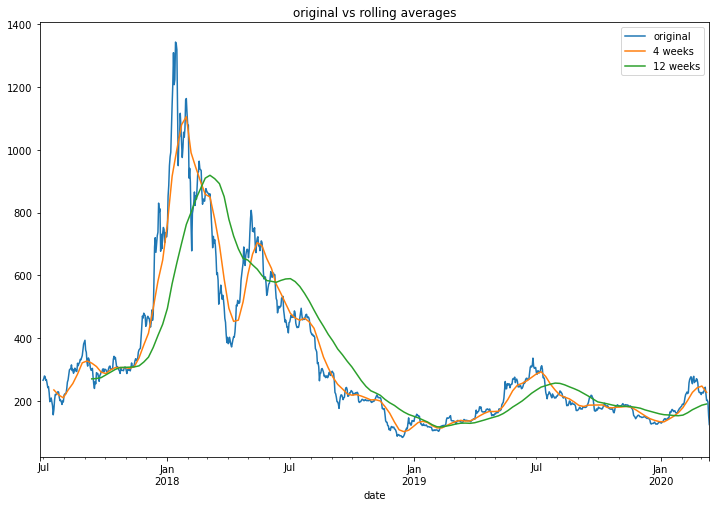

In [257]:
plt.figure(figsize=(12,8))

#original granularity
df_daily.close.plot(label='original')

#resample by week and look at 4 weeks 
df_daily.resample('W').mean().rolling(4).mean().close.plot(label=
                                                           '4 weeks')

#resample by week and look at 12 weeks 
df_daily.resample('W').mean().rolling(12).mean().close.plot(label=
                                                            '12 weeks')

plt.legend()
plt.title('original vs rolling averages')
plt.show()

### How about Lagging or Leading the data?

* `.shift`: move the data backwards and forwards by a given amount
* `.diff`: find the difference with the previous observation (or a specified further back observation)

In [259]:
df_daily.head()

,close
date,
2017-07-01,265.284615
2017-07-02,269.782500
2017-07-03,278.882083
2017-07-04,276.743333
2017-07-05,265.025833


In [262]:
#shift by one
df_daily['shift_one'] = df_daily.shift(1)
df_daily.head()

,close,shift_one
date,,
2017-07-01,265.284615,NaN
2017-07-02,269.782500,265.284615
2017-07-03,278.882083,269.782500
2017-07-04,276.743333,278.882083
2017-07-05,265.025833,276.743333


In [264]:
#shift by negative 1
df_daily.close.shift(-1)

date
2017-07-01    269.782500
2017-07-02    278.882083
2017-07-03    276.743333
2017-07-04    265.025833
2017-07-05    266.480000
                 ...    
2020-03-09    201.577500
2020-03-10    195.910417
2020-03-11    152.763333
2020-03-12    124.060476
2020-03-13           NaN
Freq: D, Name: close, Length: 987, dtype: float64

In [266]:
#difference by one
df_daily['diff_one'] = df_daily.close.diff(1)

In [268]:
df_daily.head()

,close,shift_one,diff_one
date,,,
2017-07-01,265.284615,NaN,NaN
2017-07-02,269.782500,265.284615,4.497885
2017-07-03,278.882083,269.782500,9.099583
2017-07-04,276.743333,278.882083,-2.138750
2017-07-05,265.025833,276.743333,-11.717500


In [272]:
df_daily['diff_other'] = df_daily.close - df_daily.shift_one

In [273]:
df_daily.head()

,close,shift_one,diff_one,diff_other
date,,,,
2017-07-01,265.284615,NaN,NaN,NaN
2017-07-02,269.782500,265.284615,4.497885,4.497885
2017-07-03,278.882083,269.782500,9.099583,9.099583
2017-07-04,276.743333,278.882083,-2.138750,-2.138750
2017-07-05,265.025833,276.743333,-11.717500,-11.717500


## Timezones

#### use `tz_localize("UTC")` to set timezone

In [280]:
# df = df.tz_localize('UTC')
df.head()

,close
date,
2017-07-01 11:00:00+00:00,257.13
2017-07-01 12:00:00+00:00,263.12
2017-07-01 13:00:00+00:00,275.01
2017-07-01 14:00:00+00:00,274.83
2017-07-01 15:00:00+00:00,268.79


#### use `tz_convert` to change timezones 

In [283]:
#convert to 'America/Chicago'
df= df.tz_convert('America/Chicago')
df.head()

,close
date,
2017-07-01 06:00:00-05:00,257.13
2017-07-01 07:00:00-05:00,263.12
2017-07-01 08:00:00-05:00,275.01
2017-07-01 09:00:00-05:00,274.83
2017-07-01 10:00:00-05:00,268.79


#### extract timezone

In [287]:
df.index.tz

<DstTzInfo 'America/Chicago' LMT-1 day, 18:09:00 STD>

#### use .tz_localize(tz=None) to remove timezone 

In [289]:
df = df.tz_localize(tz=None)
df.head()

,close
date,
2017-07-01 06:00:00,257.13
2017-07-01 07:00:00,263.12
2017-07-01 08:00:00,275.01
2017-07-01 09:00:00,274.83
2017-07-01 10:00:00,268.79


## Timedelta

#### use timedelta to alter a date

In [290]:
#set todays date using datetime
today

datetime.datetime(2022, 9, 21, 11, 31, 42, 173690)

In [292]:
#subtract using pd.Timedelta()
today - pd.Timedelta(days=2)

datetime.datetime(2022, 9, 19, 11, 31, 42, 173690)

In [297]:
#add
today + pd.Timedelta(days=2)

datetime.datetime(2022, 9, 23, 11, 31, 42, 173690)

#### subtract two dates

In [298]:
today

datetime.datetime(2022, 9, 21, 11, 31, 42, 173690)

In [299]:
date

Timestamp('1970-01-07 00:00:00')

In [300]:
today - date

Timedelta('19250 days 11:31:42.173690')